In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Why do EDA

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

In [5]:
# Remember it is an iterative process

### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

### Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

# Age
Conclusion

In [13]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
q1=titanic['Age'].describe()['25%']
q3= titanic['Age'].describe()['75%']
iqr= q3-q1
iqr

17.875

In [15]:
titanic['Age'].var()

211.0191247463081

In [16]:
titanic['Age'].skew()

0.38910778230082704

<Axes: xlabel='Age', ylabel='Count'>

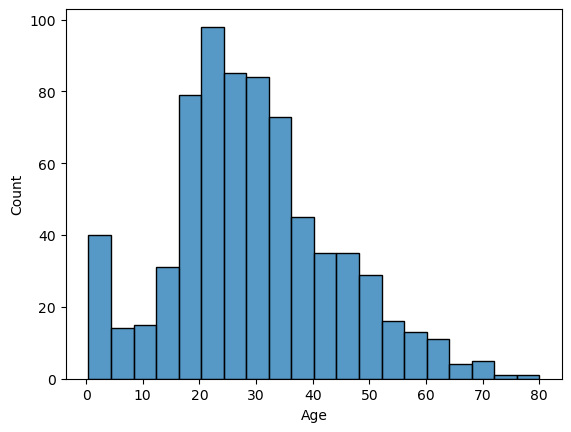

In [17]:
sns.histplot(x=titanic['Age'],bins=20)

<Axes: xlabel='Age', ylabel='Density'>

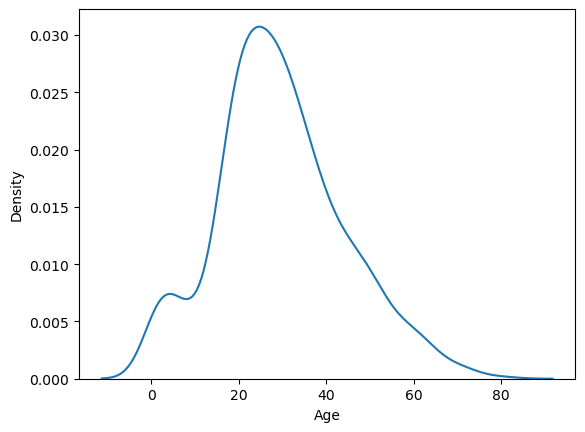

In [18]:
sns.kdeplot(x= titanic['Age'])

In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
titanic.drop(columns=['PassengerId','Ticket','Cabin'],inplace=True)

In [23]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [24]:
e = titanic['Embarked'].mode()[0]

In [25]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [26]:
titanic['Embarked'].fillna(e, inplace=True)

In [27]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [28]:
titanic['Age']=titanic['Age'].fillna(np.round(titanic['Age'].mean())).astype('int64')

In [29]:
titanic['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    30
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


In [31]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.742985,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.011583,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
titanic['Age'].min()

0

In [33]:
titanic[titanic['Age'].min()==titanic['Age']]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
78,1,2,"Caldwell, Master. Alden Gates",male,0,0,2,29.0000,S
305,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,151.5500,S
469,1,3,"Baclini, Miss. Helene Barbara",female,0,2,1,19.2583,C
644,1,3,"Baclini, Miss. Eugenie",female,0,2,1,19.2583,C
755,1,2,"Hamalainen, Master. Viljo",male,0,1,1,14.5000,S
803,1,3,"Thomas, Master. Assad Alexander",male,0,0,1,8.5167,C
831,1,2,"Richards, Master. George Sibley",male,0,1,1,18.7500,S


In [34]:
titanic[titanic['Fare'].min()==titanic['Fare']]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,"Leonard, Mr. Lionel",male,36,0,0,0.0,S
263,0,1,"Harrison, Mr. William",male,40,0,0,0.0,S
271,1,3,"Tornquist, Mr. William Henry",male,25,0,0,0.0,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,30,0,0,0.0,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,0.0,S
413,0,2,"Cunningham, Mr. Alfred Fleming",male,30,0,0,0.0,S
466,0,2,"Campbell, Mr. William",male,30,0,0,0.0,S
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30,0,0,0.0,S
597,0,3,"Johnson, Mr. Alfred",male,49,0,0,0.0,S
633,0,1,"Parr, Mr. William Henry Marsh",male,30,0,0,0.0,S


In [35]:
titanic['Name'].str.contains('capt',case=False)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

In [36]:
titanic[titanic['Name'].str.contains('capt',case=False)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
745,0,1,"Crosby, Capt. Edward Gifford",male,70,1,1,71.0,S


In [72]:
titanic['Survived'].nunique()

2

In [78]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

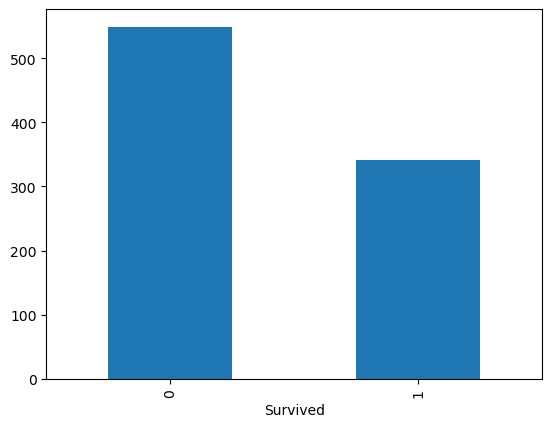

In [82]:
titanic['Survived'].value_counts().plot(kind='bar')

In [86]:
xyz=titanic['Survived'].value_counts().reset_index()
xyz

,Survived,count
0,0,549
1,1,342


<BarContainer object of 2 artists>

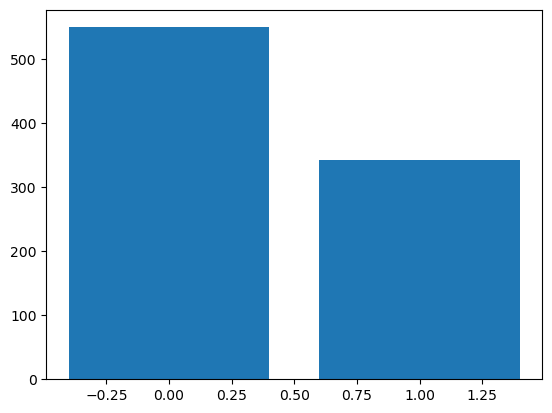

In [88]:
plt.bar(data=xyz, x='Survived', height='count')

<Axes: xlabel='Survived', ylabel='count'>

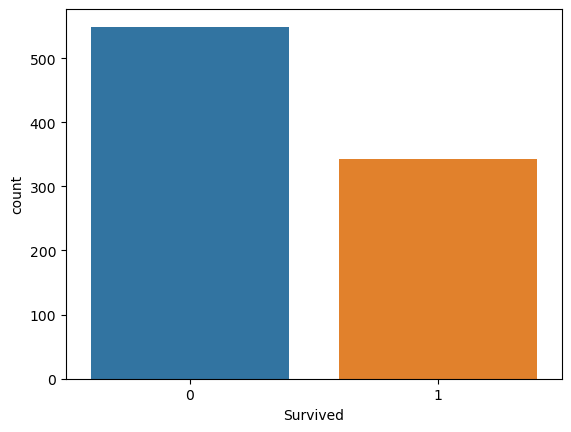

In [90]:
sns.countplot(x=titanic['Survived'])

([<matplotlib.patches.Wedge at 0x165cd2ad0>,
 [Text(-0.3925749350994583, 1.0275626113924428, ''),
  Text(0.3925750313068116, -1.0275625746369201, '')])

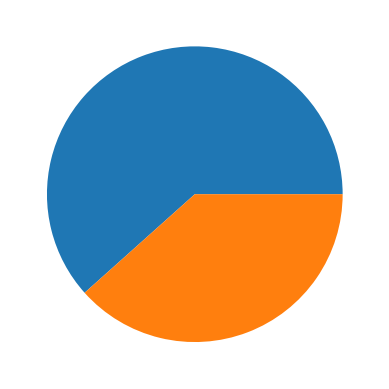

In [92]:
plt.pie(x=titanic['Survived'].value_counts(), labels=())

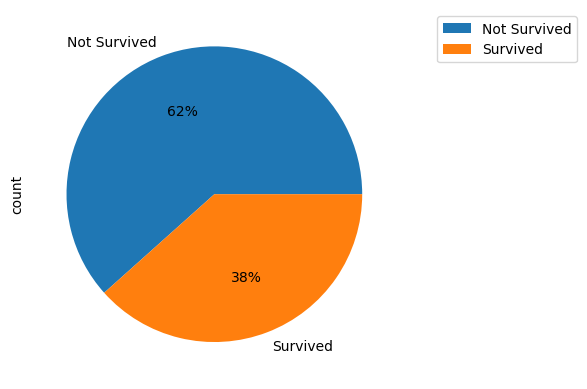

In [106]:
titanic['Survived'].value_counts().plot(kind='pie',autopct='%0.0f%%', labels=['Not Survived','Survived'])
plt.legend(bbox_to_anchor =(1,0.5,0.5,0.5))

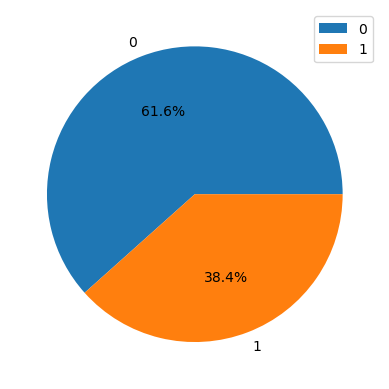

In [112]:
plt.pie(data=xyz, x='count', labels='Survived',autopct='%0.01f%%' )
plt.legend()

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

In [116]:
titanic[['Age','Fare']].corr()

,Age,Fare
Age,1.000000,0.090782
Fare,0.090782,1.000000


<Axes: xlabel='Age', ylabel='Fare'>

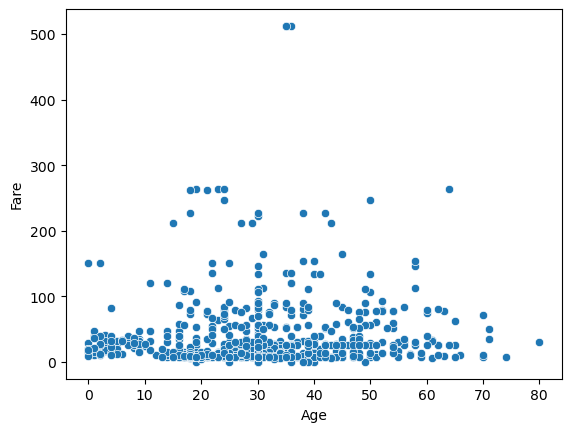

In [124]:
sns.scatterplot(titanic, x= 'Age', y='Fare')

# Categorical - Numerical

In [133]:
titanic.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

<Axes: xlabel='Pclass', ylabel='count'>

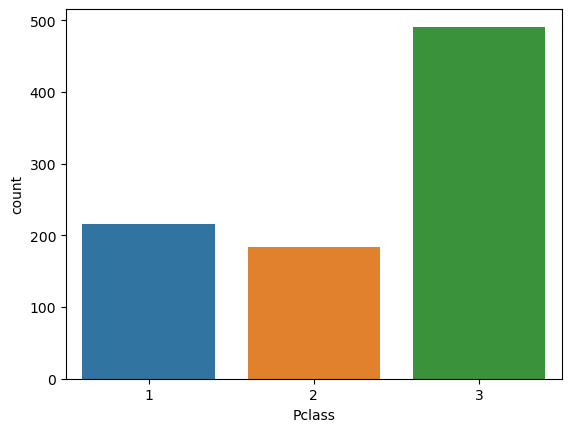

In [137]:
sns.countplot(x=titanic['Pclass'])

<Axes: xlabel='Pclass', ylabel='Fare'>

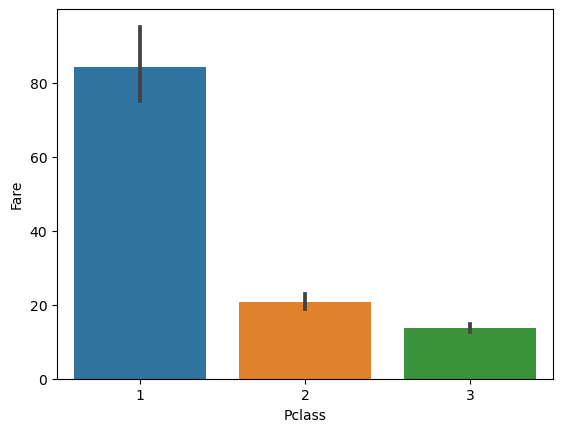

In [139]:
sns.barplot(titanic, x='Pclass', y='Fare')

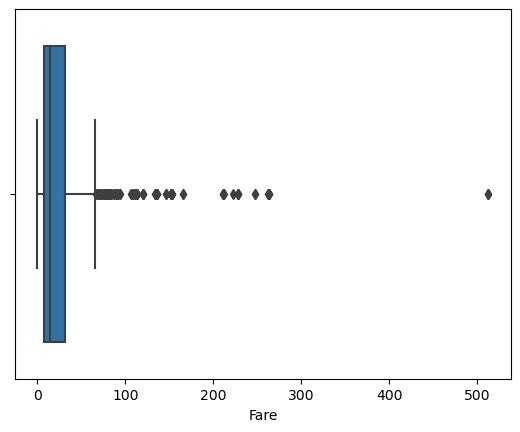

In [147]:
sns.boxplot(x=titanic['Fare'])
plt.show()

In [149]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [163]:
q1=titanic['Fare'].describe()['25%']
q3=titanic['Fare'].describe()['75%']
iqr=q3-q1
iqr

23.0896

In [165]:
max_fare=q3+1.5*iqr
max_fare

65.6344

In [187]:
abc=pd.crosstab(titanic['Survived'] ,titanic['Pclass'], normalize='all')*100
abc

Pclass,1,2,3
Survived,,,
0,8.978676,10.886644,41.750842
1,15.263749,9.764310,13.355780


<Axes: xlabel='Pclass', ylabel='Survived'>

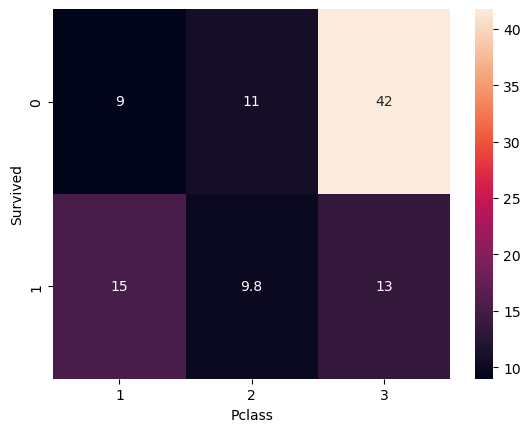

In [191]:
sns.heatmap(abc, annot=True)

# Feature Engineering on Fare col

In [196]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,C


In [198]:
titanic['SibSp']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [200]:
titanic['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [207]:
titanic['Family_Size']=titanic['SibSp']+titanic['Parch']+1

In [209]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,S,1
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30,1,2,23.4500,S,4
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,C,1


In [211]:
titanic['Family_Size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [226]:
def family_size(n):
    if n==1:
        return 'Alone';
    elif n>1 and n<=4:
        return 'Small';
    elif n>4 and n<=7:
        return 'Medium';
    elif n>7 and n<=12:
        return 'Large'



In [228]:
titanic['Family_Type']=titanic['Family_Size'].apply(family_size)

In [230]:
titanic['Family_Type']

0      Small
1      Small
2      Alone
3      Small
4      Alone
       ...  
886    Alone
887    Alone
888    Small
889    Alone
890    Alone
Name: Family_Type, Length: 891, dtype: object

In [243]:
pd.crosstab(titanic['Survived'],titanic['Family_Type'], normalize=True , margins=True)*100

Family_Type,Alone,Large,Medium,Small,All
Survived,,,,,
0,41.975309,1.459035,4.377104,13.804714,61.616162
1,18.294052,0.000000,1.122334,18.967452,38.383838
All,60.269360,1.459035,5.499439,32.772166,100.000000


In [245]:
titanic['Family_Size'].sum()

1697